# SCC0633/SCC5908 - Processamento de Linguagem Natural
> **Docente:** Thiago Alexandre Salgueiro Pardo \
> **Estagiário PAE:** Germano Antonio Zani Jorge


# Integrantes do Grupo: GPTrouxas
> André Guarnier De Mitri - 11395579 \
> Daniel Carvalho - 10685702 \
> Fernando - 11795342 \
> Lucas Henrique Sant'Anna - 10748521 \
> Magaly L Fujimoto - 4890582

# Abordagem Estatístico
A arquitetura da solução estatística/neural envolve duas abordagens que
serão descritas neste documento. A primeira abordagem envolve utilizar
TF-IDF e Naive Bayes. E a segunda abordagem irá utilizar Word2Vec e um
modelo transformers pré-treinado da família BERT, realizando finetuning do
modelo.

Na primeira abordagem, utilizaremos o TF-IDF, que leva em consideração a
frequência de ocorrência dos termos em um corpus e gera uma sequência de
vetores que serão fornecidos ao Naive Bayes para classificação da review como
positiva ou negativa.


Na segunda abordagem, utilizaremos o Word2Vec para vetorizar as reviews.
Após dividir em treino e teste, faremos o fine tuning de um modelo do tipo BERT
para o nosso problema e dataset específico. Com o BERT adaptado, faremos a
classificação de nossos textos, medindo o seu desempenho com F1 score e
acurácia.

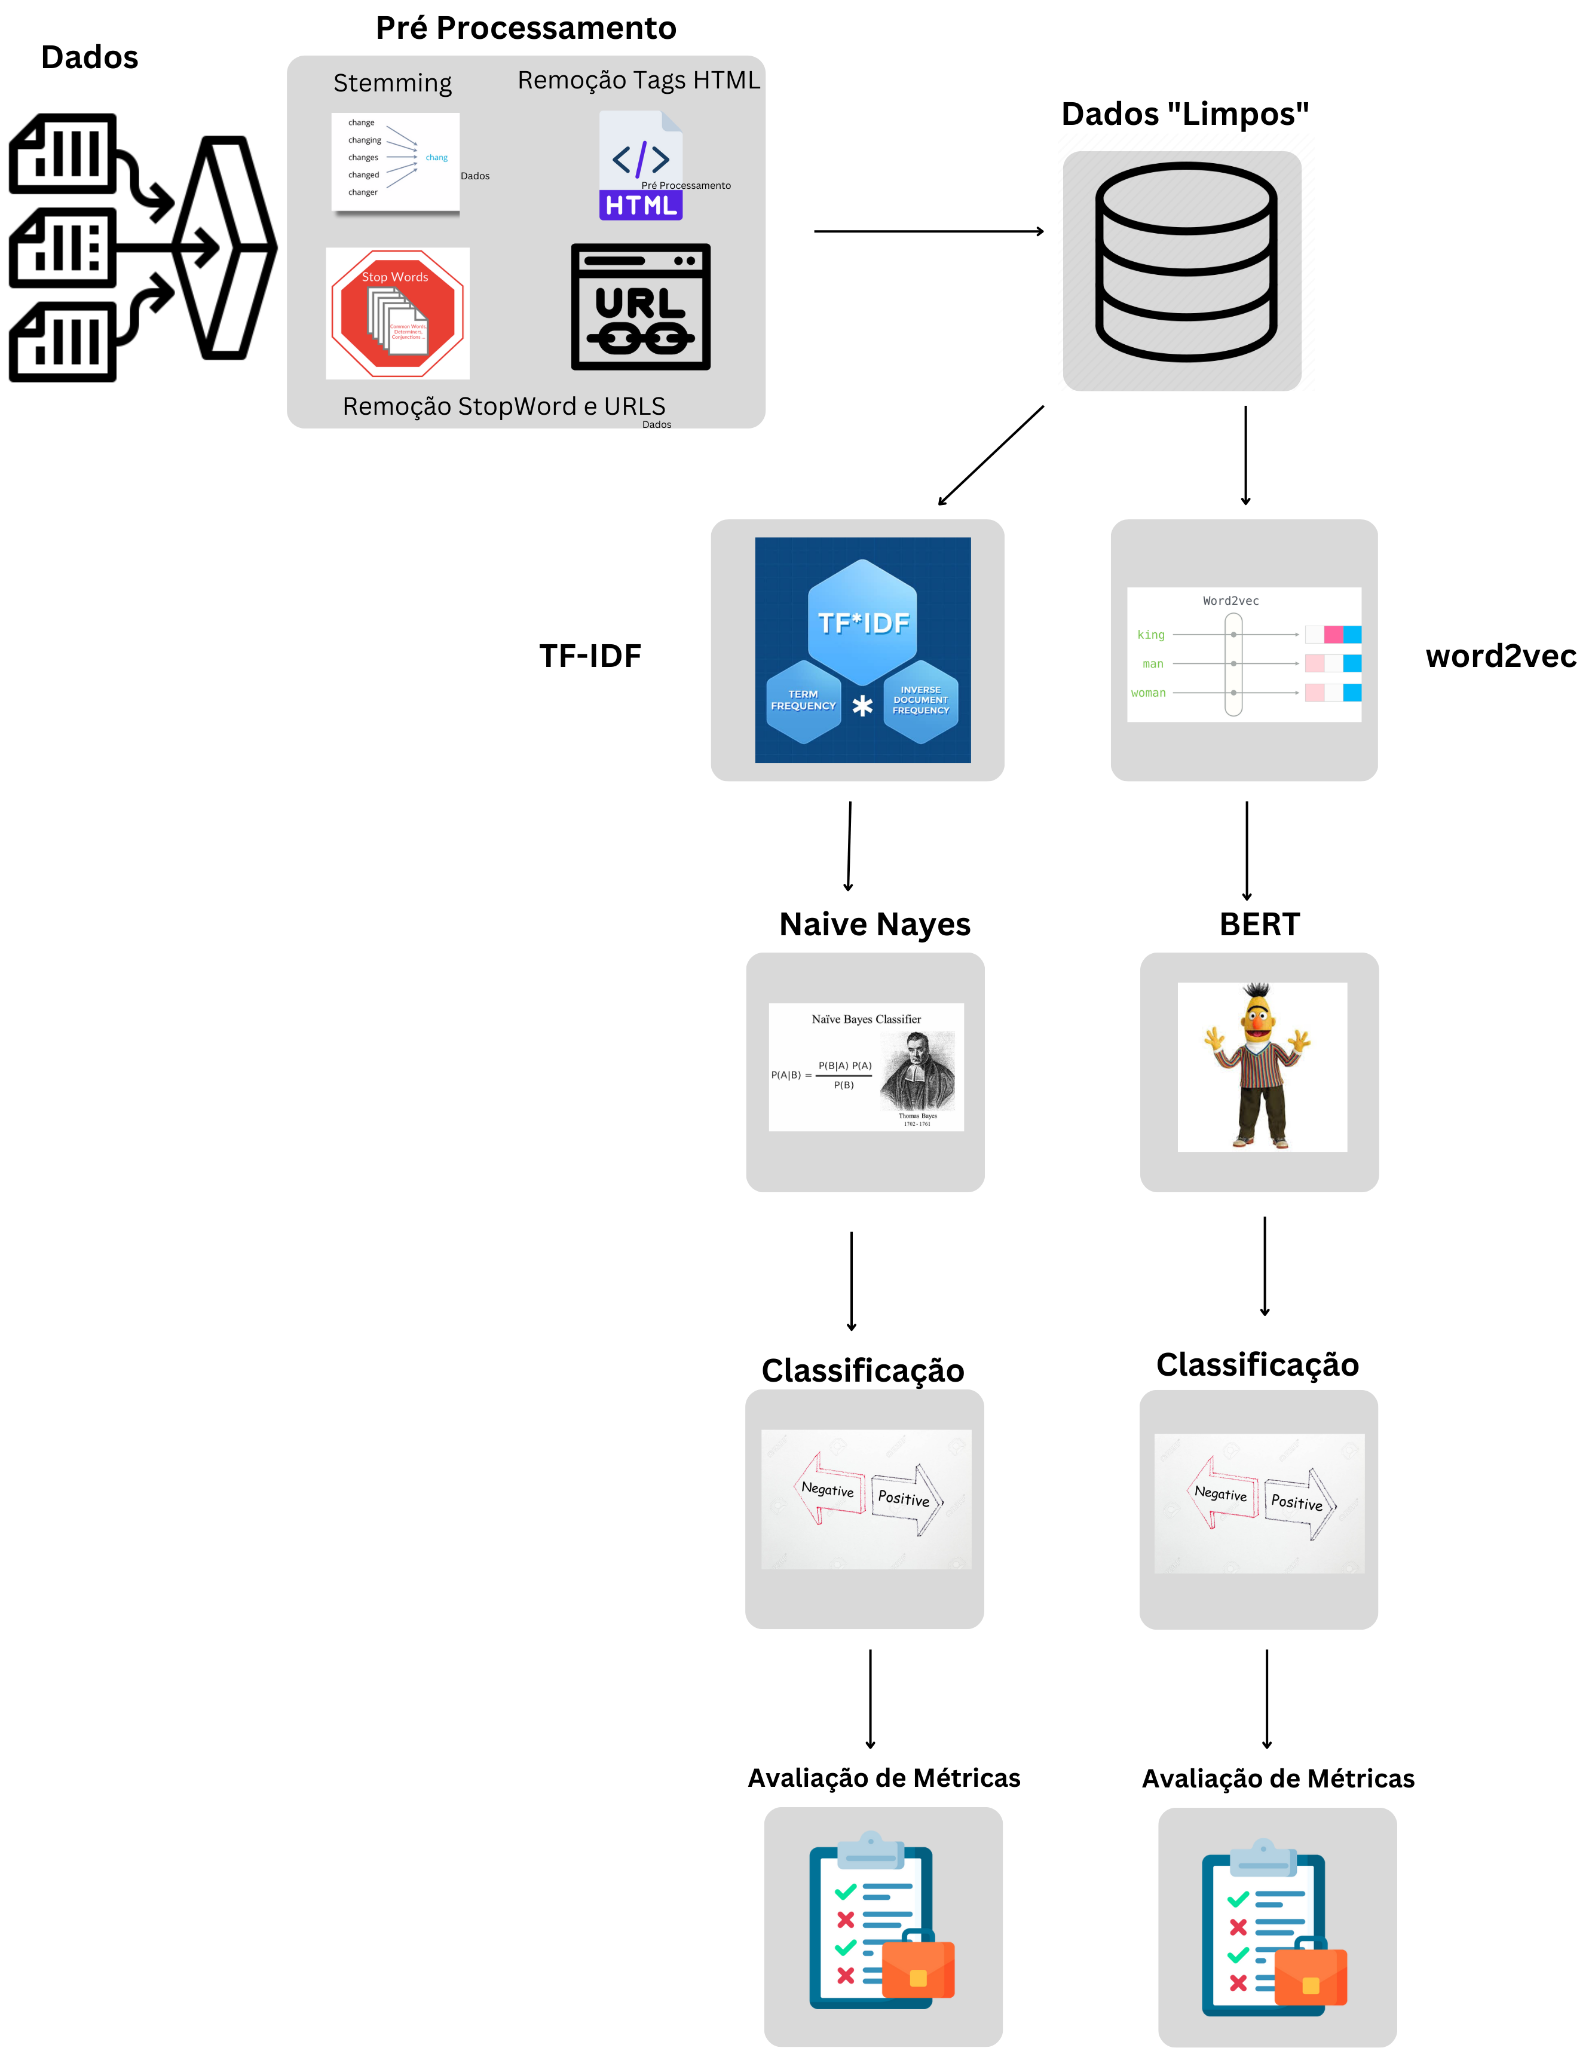


## # Etapas da Abordagem Estatística

1. **Bibliotecas**: Importamos as bibliotecas necessárias, considerando pandas para manipulação de dados, train_test_split para dividir o conjunto de dados em conjuntos de treinamento e teste, TfidfVectorizer para vetorização de texto usando TF-IDF, MultinomialNB para implementar o classificador Naive Bayes Multinomial e algumas métricas de avaliação.

2. **Conjunto de dados**: Carregar o conjunto de dados e armazená-lo em um dataframe usando pandas.

3. **Dividir o conjunto de dados**: Usamos `train_test_split` para dividir o DataFrame em conjuntos de treinamento e teste.

4. **TF-IDF**: Usamos `TfidfVectorizer` para converter as revisões de texto em vetores numéricos usando a técnica TF-IDF. Em seguida, ajustamos e transformamos tanto o conjunto de treinamento quanto o conjunto de teste.

5. **Naive Bayes**: Treinamos um classificador Naive Bayes Multinomial e usamos o modelo treinado para prever os sentimentos no conjunto de teste usando `predict`.

6. **Avaliação e Resultados**: Salvamos os resultados em um novo dataframe `results_df` contendo as revisões do conjunto de teste, os sentimentos originais e os sentimentos previstos pelo modelo. Além disso, avaliamos o modelo verificando algumas métricas e a matriz de confusão.




## # Baixando, Carregando os dados e Pré Processamento

1. Transformar todos os textos em lowercase \\
2. Remoção de caracteres especiais \\
3. Remoção de stop words \\
4. Lematização (Lemmatization) \\
5. Tokenização \\

In [ ]:
import pandas as pd

In [2]:
#Baixar o arquivo
!wget -O imdb.csv "https://drive.google.com/uc?export=download&id=16HJTOZE7MluSPwRRluY9s2X4akGnZFAp"

--2024-06-12 12:46:27--  https://drive.google.com/uc?export=download&id=16HJTOZE7MluSPwRRluY9s2X4akGnZFAp
Resolving drive.google.com (drive.google.com)... 74.125.201.138, 74.125.201.100, 74.125.201.102, ...
Connecting to drive.google.com (drive.google.com)|74.125.201.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=16HJTOZE7MluSPwRRluY9s2X4akGnZFAp&export=download [following]
--2024-06-12 12:46:27--  https://drive.usercontent.google.com/download?id=16HJTOZE7MluSPwRRluY9s2X4akGnZFAp&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 64.233.181.132, 2607:f8b0:4001:c09::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|64.233.181.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 66212309 (63M) [application/octet-stream]
Saving to: ‘imdb.csv’

imdb.csv            100%[===================>]  63.14M  68.6MB/s    in

In [3]:
db = pd.read_csv('imdb.csv')
db.head(5)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
db['sentiment'].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

In [5]:
valores_ausentes = db.isnull().sum(axis=0)
print('Quantidade de valores faltantes para cada variável do dataset:')
print(valores_ausentes)

Quantidade de valores faltantes para cada variável do dataset:
review       0
sentiment    0
dtype: int64


In [6]:
import re

def remove_caracteres_especiais(texto):
    padrao=r'[^a-zA-Z0-9\s]'
    texto=re.sub(padrao,'',texto)
    texto= texto.lower()
    return texto

#Apply function on review column
db['review']=db['review'].apply(remove_caracteres_especiais)
db.head(5)

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production br br the filmin...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically theres a family where a little boy j...,negative
4,petter matteis love in the time of money is a ...,positive


In [7]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [8]:
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

tokenizer=ToktokTokenizer()
stopword = nltk.corpus.stopwords.words('english')
lemma = WordNetLemmatizer()

def limpatexto(texto):
  tokens = tokenizer.tokenize(texto)
  tokens = [token.strip() for token in tokens]

  tokens = [token for token in tokens if token not in stopword]
  tokens = [lemma.lemmatize(palavra) for palavra in tokens]
  texto_preprocessado = ' '.join(tokens)

  return texto_preprocessado




In [9]:
db['review']=db['review'].apply(lambda x: limpatexto(x))

In [10]:
db.head()


,review,sentiment
0,one reviewer mentioned watching 1 oz episode y...,positive
1,wonderful little production br br filming tech...,positive
2,thought wonderful way spend time hot summer we...,positive
3,basically there family little boy jake think t...,negative
4,petter matteis love time money visually stunni...,positive


# **Conjunto de Treino e teste**

In [11]:
from sklearn.model_selection import train_test_split

X= db['review']
y= db['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 12)

# **TD-IDF e Naive Bayes**

In [48]:
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler as encoder
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
)


tfidf = TfidfVectorizer()
tfidf_train = tfidf.fit_transform(X_train)
tfidf_test = tfidf.transform(X_test)

from sklearn.naive_bayes import MultinomialNB

naive_bayes = MultinomialNB()

naive_bayes.fit(tfidf_train, y_train)
y_pred = naive_bayes.predict(tfidf_test)




In [50]:
# Criando DataFrame com resultados
results_df = pd.DataFrame({'review': X_test, 'original sentiment': y_test, 'predicted sentiment': y_pred})
results_df.head()

,review,original sentiment,predicted sentiment
34622,hard tell noonan marshall trying ape abbott co...,negative,negative
1163,well startbr br one reviewer said know youre r...,positive,positive
7637,wife kid opinion absolute abc classic havent s...,positive,positive
7045,surprise basic copycat comedy classic nutty pr...,positive,positive
43847,josef von sternberg directs magnificent silent...,positive,positive


## Avaliação

In [44]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_true, y_pred, labels, model_name):
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f'Confusion Matrix {model_name}')
    plt.show()

# Função para calcular e imprimir as métricas de avaliação
def print_evaluation_metrics(y_true, y_pred, model_name):
    print(f"Classification Report {model_name}:")
    print(classification_report(y_true, y_pred))


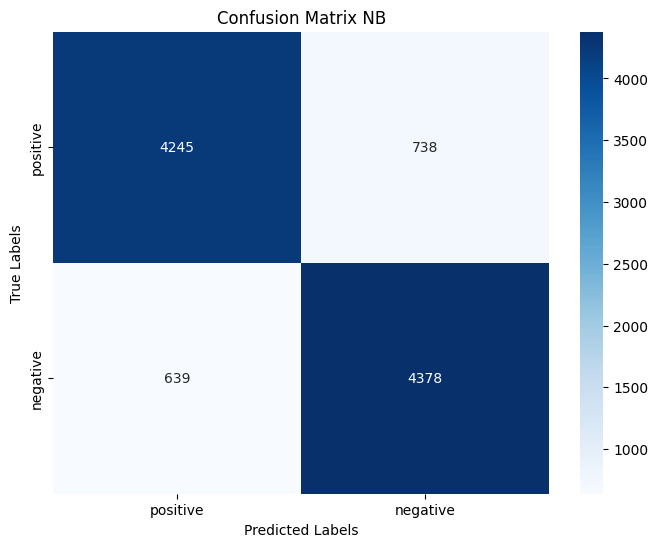

In [45]:
plot_confusion_matrix(y_test, y_pred, ['positive', 'negative'], 'NB')

In [47]:
# Imprimir as métricas de avaliação
print_evaluation_metrics(y_test, y_pred, 'NB')

Classification Report NB:
              precision    recall  f1-score   support

    negative       0.86      0.87      0.86      5017
    positive       0.87      0.85      0.86      4983

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



# Conclusão

É possível verificar no relatório de classificação que precisão e recall estão variando entre 85 a 87%. A métrica **F1-Score** combina precisão e recall, possui valor de aproximadamente 86%, o que indica um bom equilíbrio entre precisão e recall. A **Acurácia (accuracy)** geral do modelo é de 86%, o que significa que ele classificou corretamente aproximadamente 86% de todos os exemplos no conjunto de teste.

O modelo Naive Bayes com vetorização TF-IDF conseguiu alcançar uma precisão, recall e F1-Score bastante equilibrados para ambas as classes, com uma acurácia geral de 86%. Podemos afirmar que o modelo é capaz de fazer previsões precisas em relação ao sentimento das revisões. Assim, podemos afirmar que o modelo estatístico possui um desempenho consideravelmente superior em relação à abordagem simbólica.
